<a href="https://colab.research.google.com/github/kyoungkyoung/DataScience2024/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_CCTV_%EC%9D%B8%EA%B5%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 : 서울시 구별 CCTV 대수 + 서울시 구별 인구수(전체, 한국인, 외국인, 65세 이상 고령자)

## 목적 : 데이터 분석

In [ ]:
# 폰트 설치 -> 한국어 폰트 설정하기 위해서 가장 먼저 시작

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,386 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and dire

In [ ]:
# matplotlib 나눔 바른고딕체로 폰트 변경하기
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

##**⬆ 위의 코드를 실행한 후 재시작**

In [ ]:
# 데이터 파일을 가져오기 위해 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CCTV csv파일 가져오기
csvPath = '/content/drive/MyDrive/DataScience/data/01. CCTV_in_Seoul.csv'
xlsxPath = '/content/drive/MyDrive/DataScience/data/01. population_in_Seoul.xls'

import pandas as pd
import numpy as np

cctv_seoul = pd.read_csv(csvPath, encoding='utf-8')

In [ ]:
# 데이터 불러온 후, 일단 차례대로 함수 실행 -> info(), describe(), head(), tail()
cctv_seoul.info()
cctv_seoul.describe() # cctv_seoul의 수치형 데이터(int64, float64)의 컬럼 데이터의 통계치를 보여준다.
cctv_seoul.head()
cctv_seoul.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
22,종로구,1002,464,314,211,630
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109


In [ ]:
# 컬럼명 '기관명' -> '구별' 로 변경
cctv_seoul.rename(columns={'기관명': '구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [ ]:
# '최근증가율' 컬럼 추가 => 2번 실행해도 하나만 생성된다
cctv_seoul['최근증가율'] = (cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년'])/cctv_seoul['2013년도 이전']*100

In [ ]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [ ]:
# 데이터에 질문을 던지자!
# CCTV 대수가 가장 많은 구는 어디? / 가장 적은 구는 어디?
# 소계를 기준으로 가장 많은 구 5개 / 적은 구 5개          => 질문의 구체화
cctv_seoul.sort_values(by='소계', ascending=False).head(10)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374
6,구로구,1561,1142,173,246,323,64.973730
4,관악구,1496,846,260,390,613,149.290780
16,성북구,1464,1009,78,360,204,63.627354
10,동대문구,1294,1070,23,198,579,74.766355
8,노원구,1265,542,57,451,516,188.929889


In [ ]:
cctv_seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
17,송파구,618,529,21,68,463,104.347826
24,중랑구,660,509,121,177,109,79.960707
23,중구,671,413,190,72,348,147.699758


In [ ]:
# 질문 : 최근 증가율 가장 높은 5구 / 가장 적은 5구
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [ ]:
cctv_seoul.sort_values(by='최근증가율', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266


In [ ]:
# cctv_seoul 에서 '2013년도 이전', '2014년', '2015년', '2016년' 컬럼을 삭제
cctv_seoul.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True)
cctv_seoul.head()

,구별,소계,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [ ]:
# usecols를 알기 위해서는 먼저 excel 파일의 내용을 눈으로 확인한 후에 선택한다.
pop_seoul = pd.read_excel(xlsxPath, header=2, usecols='B,D,G,J,N')

In [ ]:
pop_seoul.info()
pop_seoul.describe()
pop_seoul.head()
pop_seoul.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   계         26 non-null     float64
 2   계.1       26 non-null     float64
 3   계.2       26 non-null     float64
 4   65세이상고령자  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


,자치구,계,계.1,계.2,65세이상고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [ ]:
# pop_seoul 컬럼명 바꾸기
print(pop_seoul.columns)
pop_seoul.columns = ['구별', '인구', '한국인', '외국인', '고령자']
pop_seoul.head()

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')


,구별,인구,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
# 불필요한 행[0,25] 을 삭제하기
pop_seoul.drop([0,26], inplace=True)

In [ ]:
# index 번호를 0-24로 변경
# 기존 index를 없애고 싶다면 drop=True 옵션을 넣어준다!
pop_seoul.reset_index(drop=True, inplace=True)
pop_seoul

,구별,인구,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0
5,동대문구,369496.0,354079.0,15417.0,54173.0
6,중랑구,414503.0,409882.0,4621.0,56774.0
7,성북구,461260.0,449773.0,11487.0,64692.0
8,강북구,330192.0,326686.0,3506.0,54813.0
9,도봉구,348646.0,346629.0,2017.0,51312.0


In [ ]:
# cctv_seoul, pop_seoul 데이터프레임 합치기
data_result = pd.merge(pop_seoul, cctv_seoul, on='구별')
data_result.head()

,구별,인구,한국인,외국인,고령자,소계,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621


In [ ]:
# 고령자의 비율
data_result['고령자비율'] = data_result['고령자'] / data_result['인구'] * 100

In [ ]:
# 외국인의 비율
data_result['외국인비율'] = data_result['외국인'] / data_result['인구'] * 100

In [ ]:
data_result.head()

,구별,인구,한국인,외국인,고령자,소계,최근증가율,고령자비율,외국인비율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [ ]:
data_result.columns = ['구별', '인구', '한국인', '외국인', '고령자', 'CCTV대수', 'CCTV증가율', '고령자비율', '외국인비율']

In [ ]:
# matplotlib으로 그래프를 그리기 위해서는 index를 '구별'로 변경
data_result.set_index('구별', inplace=True)
data_result.head()

,인구,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
구별,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


##matplotlib 으로 그래프 그리기

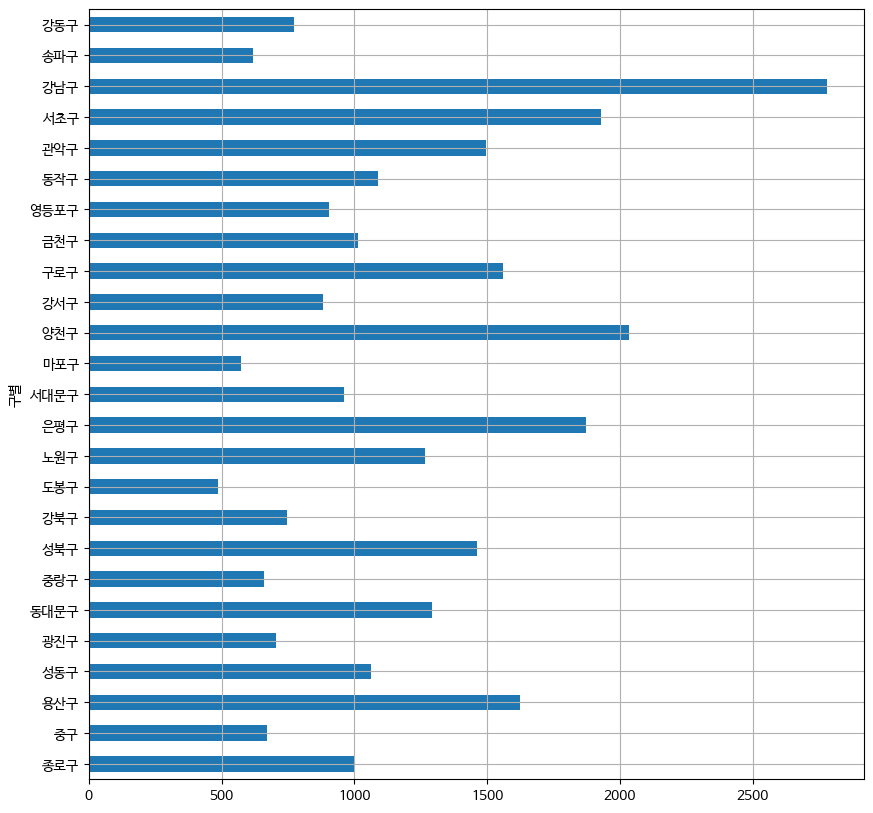

In [ ]:
# 하단 plot() 함수는 matplotlib 라이브러리가 아니라 pandas 라이브러리임
# data_result['CCTV대수']를 barh형태로 출력 => Y축이 CCTV대수
import matplotlib.pyplot as plt

# plt.figure()
data_result['CCTV대수'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

<Axes: ylabel='구별'>

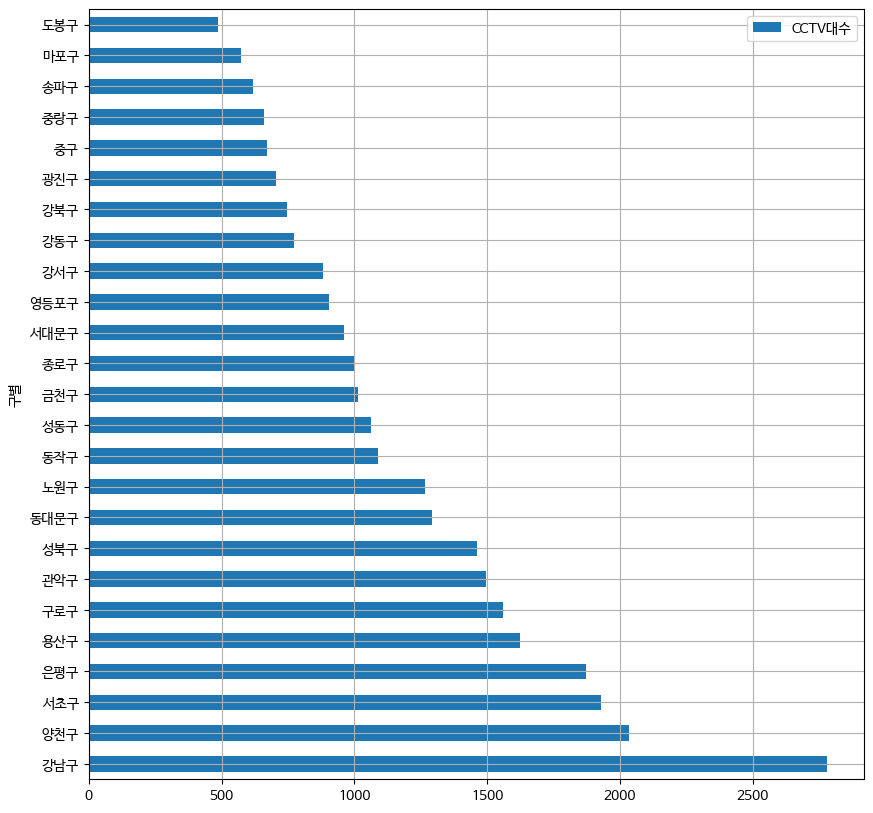

In [ ]:
# matplotlib으로 'CCTV대수'를 기준으로 가장 많은 구부터 출력
# sort_values를 실행한 값을 data_result에 저장하고, 다음줄에서 plot
data_result.sort_values(by='CCTV대수', ascending=False, inplace=True)

# y값으로 올 데이터 값을 지정해서 plot함수를 써도 되고 / 데이터프레임을 지정해서 plot 함수를 쓴 뒤에 속성값으로 y값을 지정해줘도 된다.
# x값은 인덱스 컬럼이 오게된다.
# data_result['CCTV대수'].plot(kind='barh', grid=True, figsize=(10,10))
data_result.plot(kind='barh', y='CCTV대수', grid=True, figsize=(10,10))

<Axes: ylabel='구별'>

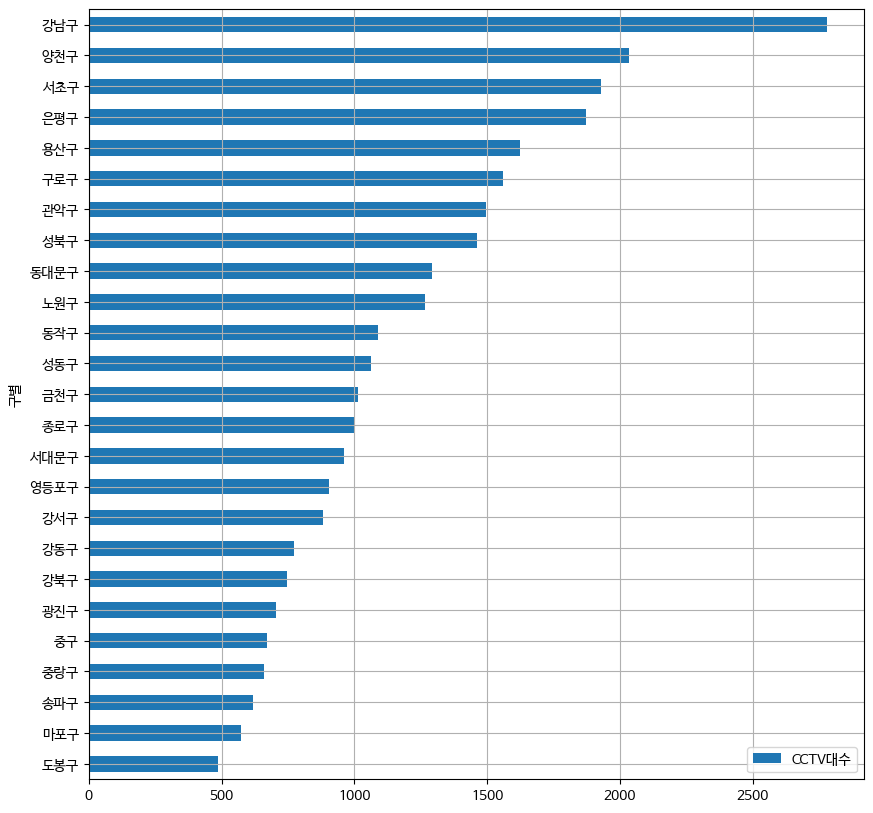

In [ ]:
# data_result['CCTV대수'].sort_values() 에서 애초에 CCTV대수 에 대해서 sorting을 한다고 했기 때문에 sort_values의 옵션으로 by='CCTV옵션'(기준)을 넣지 않아도 된다.
# data_result['CCTV대수'].sort_values(ascending=True).plot(kind='barh', grid=True, figsize=(10,10))

# y값 속성을 지정해주지 않으면 모든 값에 대해서 그래프가 그려짐
data_result.sort_values(by='CCTV대수', ascending=True).plot(kind='barh', y='CCTV대수', grid=True, figsize=(10,10))

<Axes: xlabel='구별'>

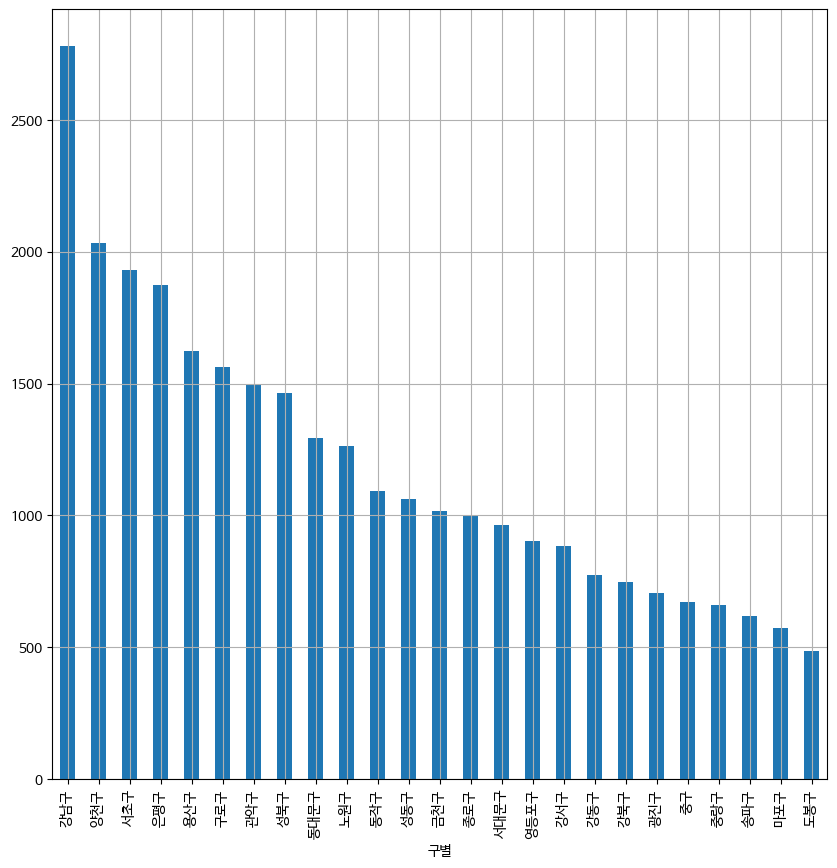

In [ ]:
# matplotlib으로 'CCTV대수'를 기준으로 가장 많은 구부터 출력
# sort_values를 실행한 값을 data_result에 저장하고, 다음줄에서 plot
data_result.sort_values(by='CCTV대수', ascending=False, inplace=True)
data_result['CCTV대수'].plot(kind='bar', grid=True, figsize=(10,10))

In [ ]:
data_result

,인구,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
구별,,,,,,,,
강남구,570500.0,565550.0,4950.0,63167.0,2780,150.619195,11.072217,0.867660
양천구,479978.0,475949.0,4029.0,52975.0,2034,34.671731,11.036964,0.839413
서초구,450310.0,445994.0,4316.0,51733.0,1930,63.371266,11.488308,0.958451
은평구,494388.0,489943.0,4445.0,72334.0,1873,85.237258,14.631019,0.899091
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
구로구,447874.0,416487.0,31387.0,56833.0,1561,64.973730,12.689506,7.007998
관악구,525515.0,507203.0,18312.0,68082.0,1496,149.290780,12.955291,3.484582
성북구,461260.0,449773.0,11487.0,64692.0,1464,63.627354,14.025062,2.490353
동대문구,369496.0,354079.0,15417.0,54173.0,1294,74.766355,14.661322,4.172440


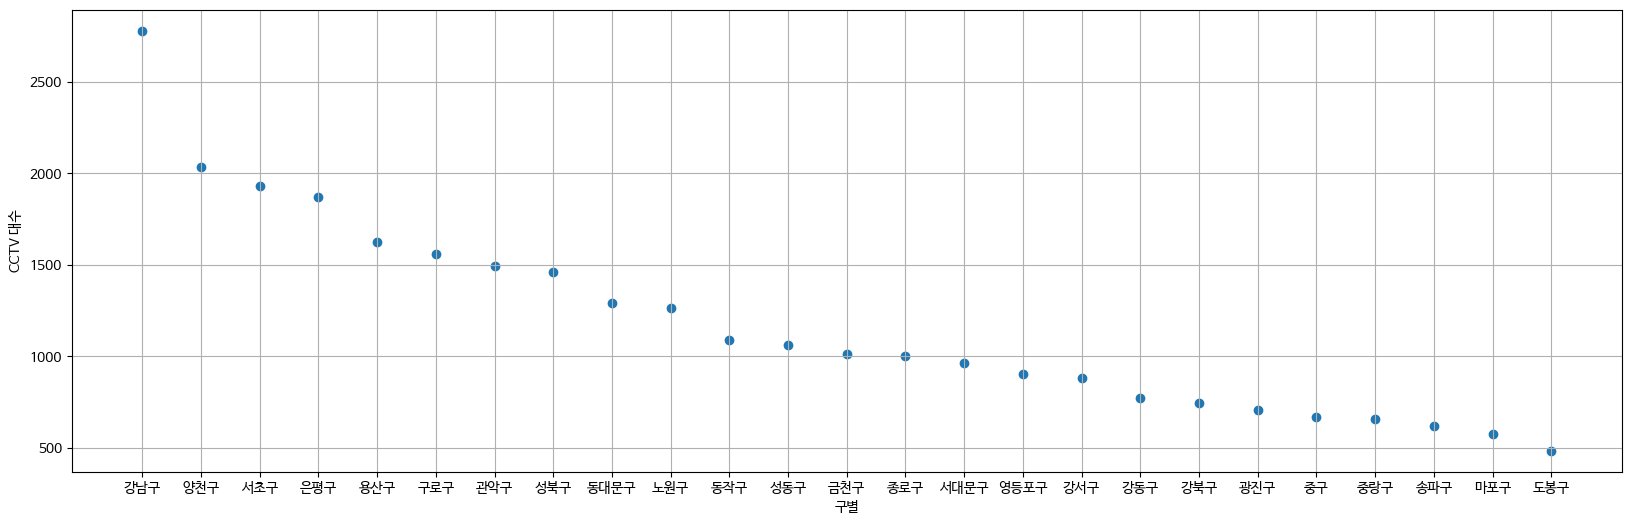

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(data_result.index, data_result['CCTV대수'])
plt.xlabel('구별')
plt.ylabel('CCTV 대수')
plt.grid()
plt.show()

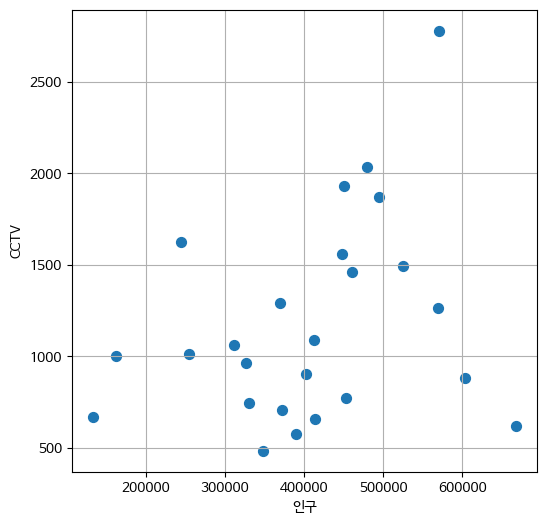

pandas.core.series.Series

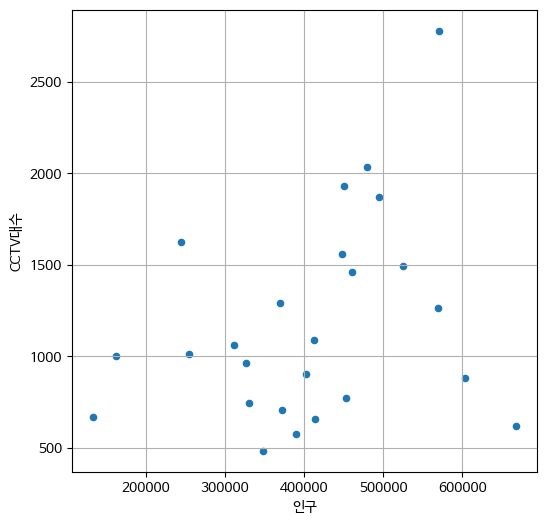

In [ ]:
# 산점도(x,y) 그래프

# 1. matplotlib 이용해서 그리기
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구'], data_result['CCTV대수'], s=50)
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 2. pandas의 plot 이용해서 그리기
data_result.plot(kind='scatter', x='인구', y='CCTV대수', grid=True, figsize=(6,6))
# 만약, index가 x축이길 바란다면

type(data_result['CCTV대수'])  #Series data => Dataframe이 아님! 그래서 아래 있는 코드가 에러!
# data_result['CCTV대수'].plot(kind='scatter', y='CCTV대수', gird=True, figsize=(6,6))



In [ ]:
# 1차 방정식 그래프 그리기
fp1 = np.polyfit(data_result['인구'], data_result['CCTV대수'],1)    # 마지막 1은 1차 방정식
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

AttributeError: module 'numpy' has no attribute 'linespace'

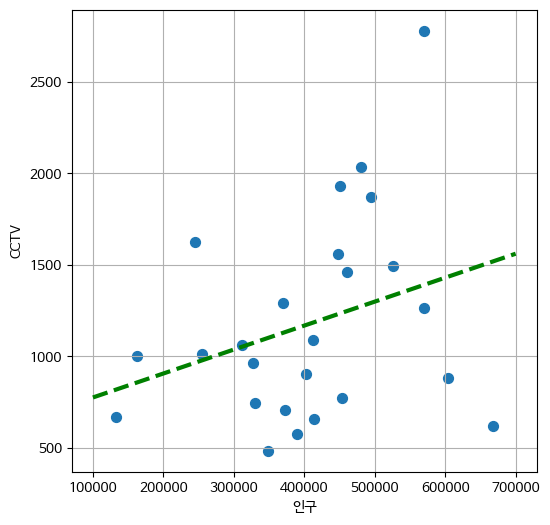

In [ ]:
# x,y 데이터를 받아들여서 1차함수를 생성(직선의 방정식)
fp1 = np.polyfit(data_result['인구'], data_result['CCTV대수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구'], data_result['CCTV대수'], s=50)             # 점
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')                        # 직선의 방정식
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [ ]:
data_result['오차'] = np.abs(data_result['CCTV대수'] - f1(data_result['인구']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,인구,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율,오차
구별,,,,,,,,,
강남구,570500.0,565550.0,4950.0,63167.0,2780,150.619195,11.072217,0.867660,1388.055355
송파구,667483.0,660584.0,6899.0,72506.0,618,104.347826,10.862599,1.033584,900.911312
양천구,479978.0,475949.0,4029.0,52975.0,2034,34.671731,11.036964,0.839413,760.563512
서초구,450310.0,445994.0,4316.0,51733.0,1930,63.371266,11.488308,0.958451,695.403794
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828,659.231690


<ipython-input-58-fedd980f388b>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구'][n]+7700, df_sort['CCTV대수'][n]-20,


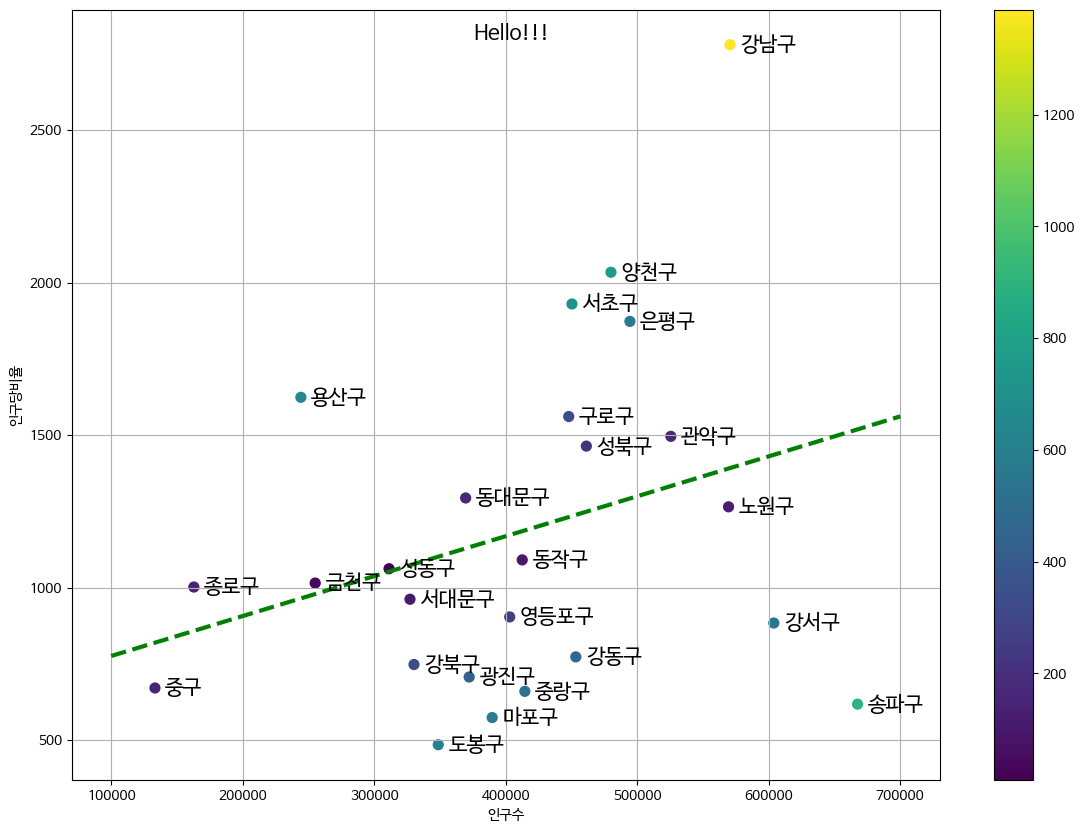

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구'], data_result['CCTV대수'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    # text를 출력할 x좌표의 시작점, y좌표의 시작점, 찍을 내용
    plt.text(df_sort['인구'][n]+7700, df_sort['CCTV대수'][n]-20,
             df_sort.index[n], fontsize=15)

temp = "Hello!!!"
plt.text(400000-25000, 2800, temp, fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()